# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("goldstock.csv").drop(columns = "Unnamed: 0")
df.head(3)

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6


Problem Statement:
This project aims to leverage a comprehensive dataset of daily gold prices spanning from January 19,
2014, to January 22, 2024, obtained from Nasdaq. The dataset encompasses key financial metrics for
each trading day, including the opening and closing prices, trading volume, as well as the highest and
lowest prices recorded during the day.
Dataset Description:
1. Date: A unique identifier for each trading day.
2. Close: Closing price of gold on the respective date.
3. Volume: Gold trading volume on the corresponding date.
4. Open: Opening price of gold on the respective date.
5. High: The highest recorded price of gold during the trading day.
6. Low: The lowest price recorded for gold in the trading day.
Project Objectives:
1. Time Series Analysis:
- Explore historical trends and patterns in gold prices over the specified time period.
- Identify seasonality, cyclicality, and any discernible long-term trends in the gold market.
2. Advanced Modeling:
- Develop predictive models to forecast future gold prices based on historical data.
- Evaluate and compare the performance of different forecasting algorithms.
3. Trading Strategy Development:
- Formulate and backtest trading strategies based on the provided price and volume information.
- Explore the feasibility of reverse trading strategies for profit maximization.
4. Market Sentiment Analysis
- Investigate the impact of market events on gold prices.
- Assess market sentiment and its influence on short-term and long-term price movements.
5. Statistical Analysis:
- Conduct statistical tests and analyses to gain insights into the characteristics of gold price movements.
- Explore correlations with external factors and macroeconomic indicators.
Considerations:
- Users are advised to validate the accuracy and reliability of the information.
- Be aware of limitations and biases inherent in financial databases.
- Acknowledge the potential impact of external events on gold prices.
Expected Deliverables:
- Time series visualizations illustrating trends and patterns.
- Predictive models for future gold price forecasting.
- Back-tested trading strategies with performance metrics.
- Market sentiment analysis reports highlighting key events and their impact.
- Statistical analyses providing insights into the characteristics of gold price movements.
This project caters to researchers, analysts, and data enthusiasts seeking to gain a deep understanding of
historical gold price trends and patterns, enabling them to make informed decisions, develop trading
strategies, and contribute to the broader understanding of market behavior.

In [22]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


# Check whether dataset contains null values

In [23]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

# Check for Duplicate Values

In [24]:
print(f"No. Of Duplicated values in the dataset are {df.duplicated().sum()}")

No. Of Duplicated values in the dataset are 18


In [25]:
print(df.shape)
df = df[~(df.duplicated())]
print(df.shape)

(2511, 6)
(2493, 6)


# Analyzing the dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2493 non-null   object 
 1   Close   2493 non-null   float64
 2   Volume  2493 non-null   float64
 3   Open    2493 non-null   float64
 4   High    2493 non-null   float64
 5   Low     2493 non-null   float64
dtypes: float64(5), object(1)
memory usage: 136.3+ KB


In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2493 non-null   datetime64[ns]
 1   Close   2493 non-null   float64       
 2   Volume  2493 non-null   float64       
 3   Open    2493 non-null   float64       
 4   High    2493 non-null   float64       
 5   Low     2493 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 136.3 KB


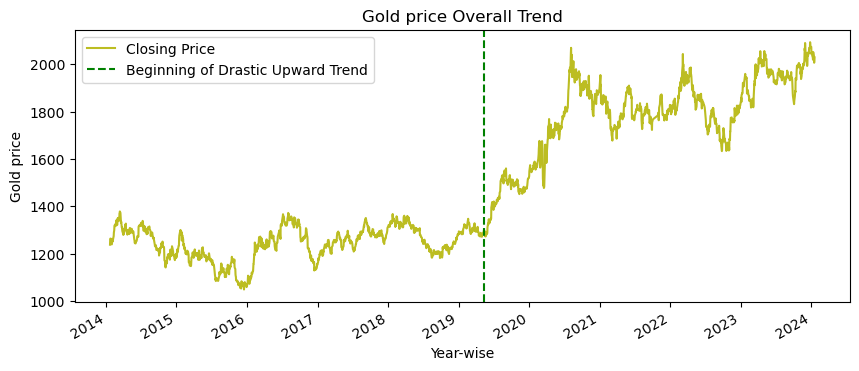

In [28]:
plt.figure(figsize=(10,4))
df.set_index("Date")['Close'].plot(title = "Gold price Overall Trend",color = sns.color_palette()[-2],label = "Closing Price")
plt.xlabel("Year-wise")
plt.ylabel("Gold price")

plt.axvline(x = "2019-05-11",color = "g",linestyle = "--",label = "Beginning of Drastic Upward Trend")
plt.legend()
plt.show()


In [10]:
# Drastic upward trend at the start of covid 

In [ ]:
# Guess what Fed increased the rates from 2.25 to 2.50 in the May 2019, 
# therefore, there was the rise in zgold Rates

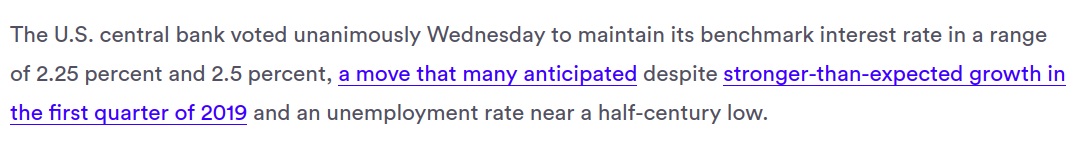

In [ ]:
# On the subsequent Years, Because of Situation in Corona, the gold rates keep rising over time
# Hence, the drastic rise

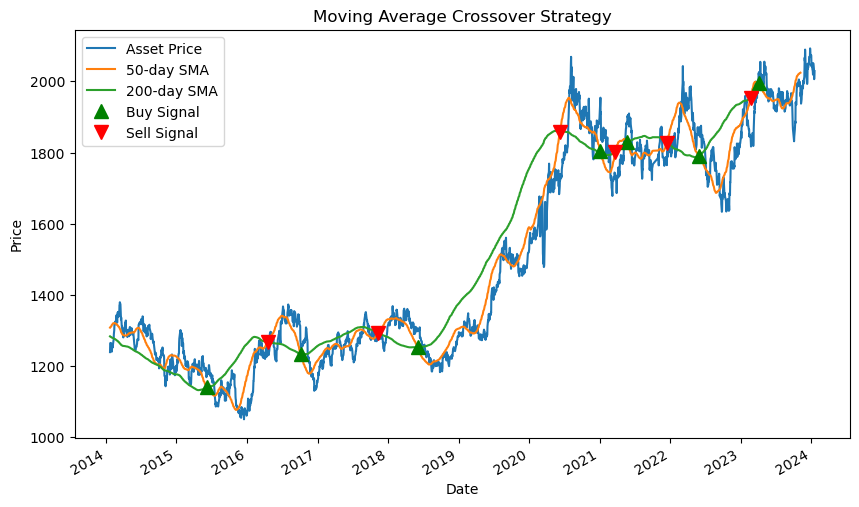

In [133]:

df = df.set_index("Date")
# Compute moving averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Implement trading strategy
df['Signal'] = np.where(df['SMA_50'] > df['SMA_200'], 1, 0)
df['Position'] = df['Signal'].diff()

# Backtest the strategy
df['Market_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['Strategy_Returns'] = df['Position'].shift(1) * df['Market_Returns']
df['Cumulative_Strategy_Returns'] = df['Strategy_Returns'].cumsum()

# Visualize results
plt.figure(figsize=(10, 6))
df['Close'].plot(label='Asset Price')
df['SMA_50'].plot(label='50-day SMA')
df['SMA_200'].plot(label='200-day SMA')
plt.plot(df[df['Position'] == 1].index, df['SMA_50'][df['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df[df['Position'] == -1].index, df['SMA_50'][df['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.legend()
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [134]:
df

,Close,Volume,Open,High,Low,1st_differnce,seasonality,SMA_50,SMA_200,Signal,Position,Market_Returns,Strategy_Returns,Cumulative_Strategy_Returns
Date,,,,,,,,,,,,,,
2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,-7.7,NaN,NaN,NaN,0,0.0,-0.003802,NaN,NaN
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,-15.1,NaN,NaN,NaN,0,0.0,-0.007497,-0.0,0.000000
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,23.7,NaN,NaN,NaN,0,0.0,0.011742,0.0,0.000000
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,21.4,NaN,NaN,NaN,0,0.0,0.010486,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,-11.7,-49.6,1310.842,1280.8880,1,0.0,-0.009313,-0.0,-0.029925
2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,13.0,-31.5,1309.930,1281.4065,1,0.0,0.010342,0.0,-0.029925
2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,1.0,-25.3,1309.254,1281.8800,1,0.0,0.000791,0.0,-0.029925


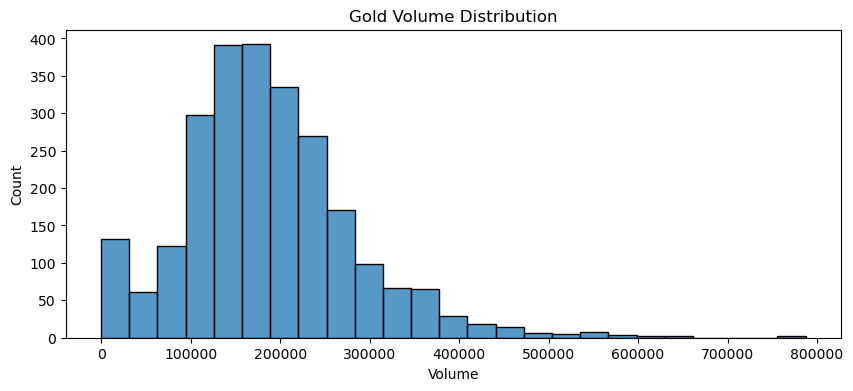

In [29]:
plt.figure(figsize=(10,4))

sns.histplot(x = df["Volume"],bins = 25)
plt.title("Gold Volume Distribution")
plt.show()

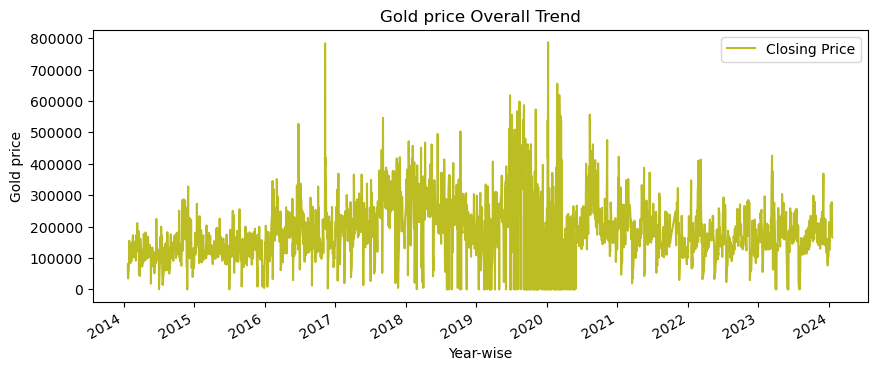

In [12]:
plt.figure(figsize=(10,4))
df.set_index("Date")['Volume'].plot(title = "Gold price Overall Trend",color = sns.color_palette()[-2],label = "Closing Price")
plt.xlabel("Year-wise")
plt.ylabel("Gold price")

#plt.axvline(x = "2019-05-11",color = "g",linestyle = "--",label = "Beginning of Drastic Upward Trend")
plt.legend()
plt.show()


In [13]:
# sns.scatterplot(data = df, x = "Volume", y = 'Close')

In [14]:
# sns.scatterplot(data = df, x = "Close", y = 'Volume')

<Axes: xlabel='Close', ylabel='Count'>

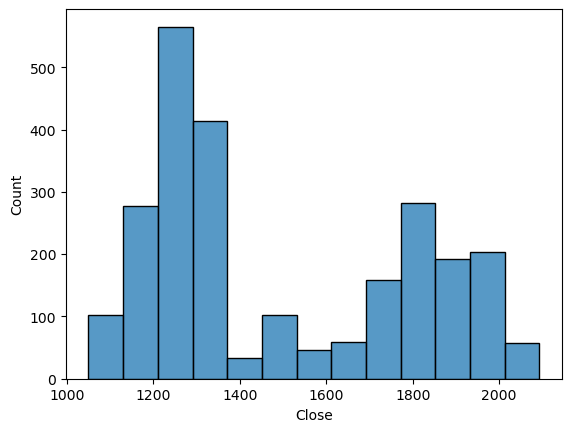

In [15]:
sns.histplot(df['Close'])

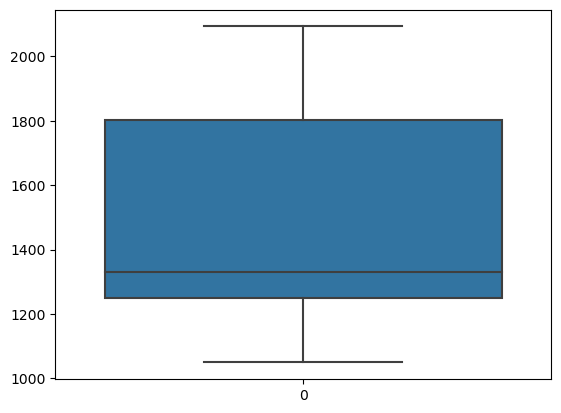

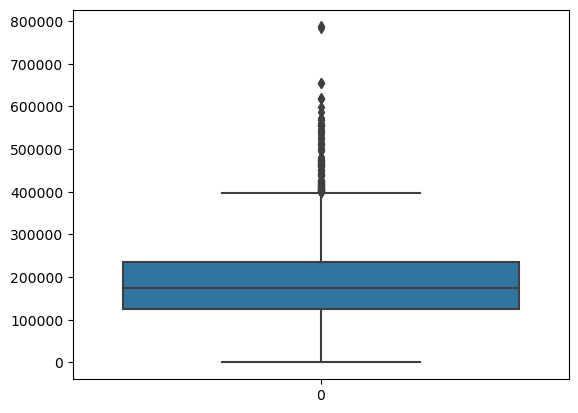

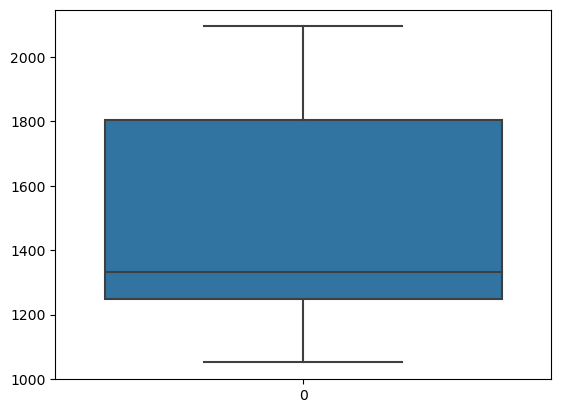

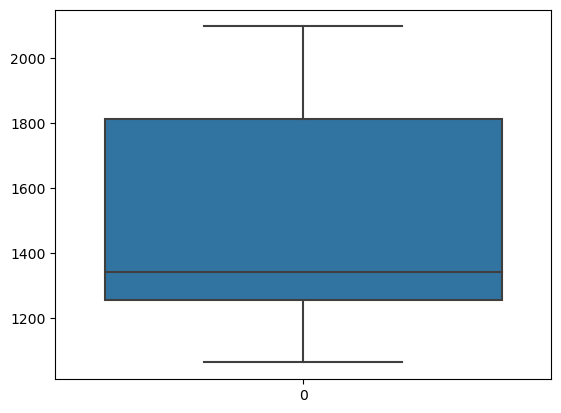

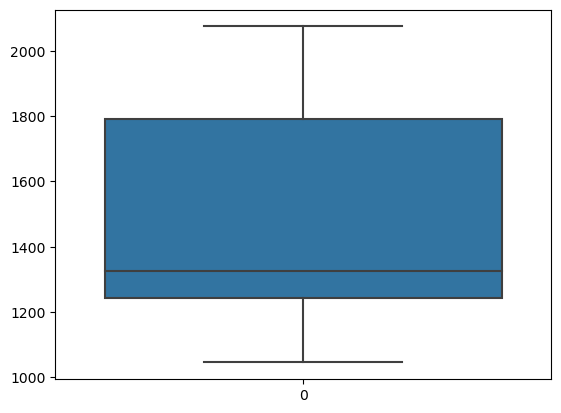

In [16]:
for column in df.drop(columns = ['Date']).columns.tolist():
    sns.boxplot(df[column])
    plt.show()

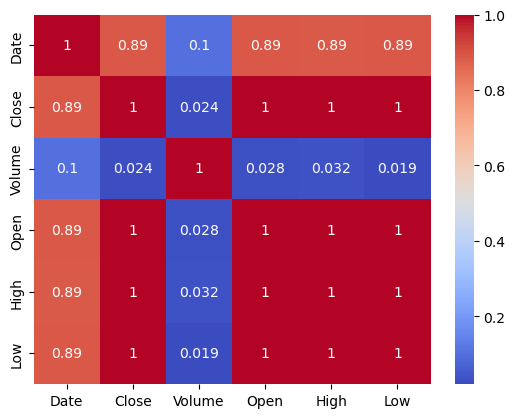

In [17]:
# Key points 
# Volume is not correlated to anything
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')
plt.show()

# Check Seasonality

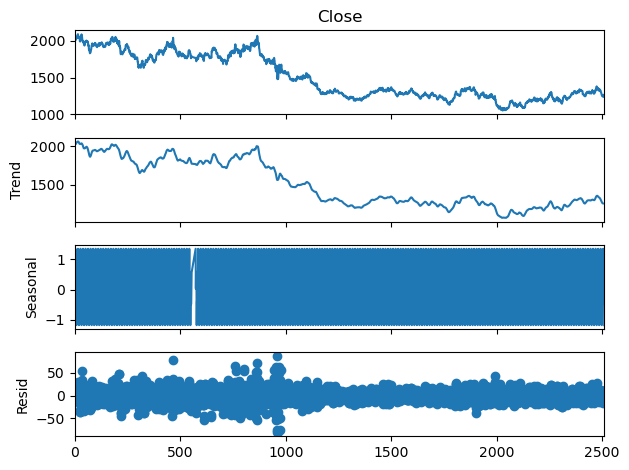

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['Close'], period = 12)

decompose.plot()
plt.show()

In [31]:
# No Seasonality, No Trend

# Check if Data is stationary or not
## Ad Fuller Test

In [32]:
from statsmodels.tsa.stattools import adfuller
def adfullertest(column):
    result = adfuller(column)
    print(f'### Augmented Dickey Fuller Test ###')
    print(f'ADF Test Stats : {result[0]}\nP Value : {result[1]}\n#Lags : {result[2]}\nNo. of Obs : {result[3]}')

    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Weak evidence against null hypothesis and my timeseries is Non-Stationary")

In [33]:
adfullertest(df['Close'])

### Augmented Dickey Fuller Test ###
ADF Test Stats : -1.682785499956474
P Value : 0.4400030156600173
#Lags : 1
No. of Obs : 2491
Weak evidence against null hypothesis and my timeseries is Non-Stationary


### Converting non stationary data to stationary data

In [34]:
df['1st_differnce'] = df['Close'] - df['Close'].shift(1)

In [35]:
adfullertest(df['1st_differnce'].dropna())

### Augmented Dickey Fuller Test ###
ADF Test Stats : -51.59957707390965
P Value : 0.0
#Lags : 0
No. of Obs : 2491
Strong evidence against null hypothesis and my timeseries is Stationary


# Predictive Modeling


In [36]:
# Trend : parameter: p d q
# Seasonality : parameter : P D Q

#d = 1 --> No of lags

In [37]:
df['seasonality'] = df['Close'] - df['Close'].shift(12)

In [38]:
adfullertest(df['seasonality'].dropna())

### Augmented Dickey Fuller Test ###
ADF Test Stats : -7.448490856571335
P Value : 5.753392748720084e-11
#Lags : 24
No. of Obs : 2456
Strong evidence against null hypothesis and my timeseries is Stationary


In [39]:
# Trend : parameter: p d q
# Seasonality : parameter : P D Q

#d = 1 --> No of lags

# D - 1

### Check partial AutoCorrelation and Autocorrelation

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(df['1st_differnce'].dropna(), lags = 9)
#lags = 14 bins - 14 month

plt.show()

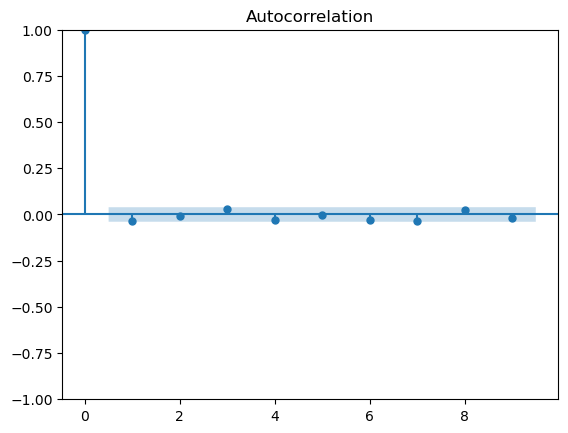

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(df['1st_differnce'].dropna(), lags = 9)
#lags = 14 bins - 14 month

plt.show()

### Since there is no autocorrelation, we cant use ARIMA or SARIMA Model

<Axes: xlabel='Date', ylabel='Close'>

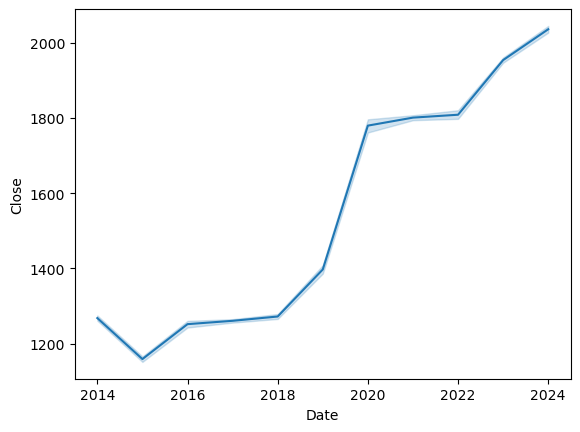

In [41]:
sns.lineplot(y = df['Close'], x= df['Date'].dt.year)

### Since there is no linear relationship, we cant use linear regression

### XG Boost

In [42]:
df1 = df.copy(deep = True)
df1['Year'] = df['Date'].dt.year
df1['Month'] = df['Date'].dt.month
df1['Day'] = df['Date'].dt.day
df1['week'] = df['Date'].dt.dayofweek
df1 = df1[['Year','Month','Day','week','Close']]
df1

,Year,Month,Day,week,Close
0,2024,1,19,4,2029.3
1,2024,1,18,3,2021.6
2,2024,1,17,2,2006.5
3,2024,1,16,1,2030.2
4,2024,1,12,4,2051.6
...,...,...,...,...,...
2506,2014,1,28,1,1250.5
2507,2014,1,27,0,1263.5
2508,2014,1,24,4,1264.5
2509,2014,1,23,3,1262.5


In [43]:
x = df1.drop(columns = 'Close')
y = df1['Close']

#### Splitting the data

In [44]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.20)
xTrain.shape,xTest.shape,yTrain.shape,yTest.shape

((1994, 4), (499, 4), (1994,), (499,))

#### Model Training

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor(n_jobs=-1, tree_method="hist")

clf = GridSearchCV(
        xgb_model,
        {"max_depth": [2, 4, 6], "n_estimators": [50, 100, 200]},
        verbose=1,
        n_jobs=2,
    )

clf.fit(xTrain,yTrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=2,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [46]:
print(clf.best_score_)
print(clf.best_params_)

0.993832675742189
{'max_depth': 6, 'n_estimators': 200}


#### Evaluation Metrics

In [47]:
from sklearn.metrics import r2_score
print(f"R2 Score : {r2_score(clf.predict(xTest),yTest)}")

R2 Score : 0.9958100646581726


In [48]:
print(f"R2 Score : {r2_score(clf.predict(xTrain),yTrain)}")

R2 Score : 0.9998683889180839


In [49]:
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error : {mean_squared_error(clf.predict(xTest),yTest)}")

Mean Squared Error : 356.0605091990653


#### Model Prediction

In [51]:
predicted_dates = pd.date_range(start= "2023-11-20", end = "2024-07-20")
prediction_df = pd.DataFrame({"Date" : predicted_dates})

prediction_df['Year'] = prediction_df['Date'].dt.year
prediction_df['Month'] = prediction_df['Date'].dt.month
prediction_df['Day'] = prediction_df['Date'].dt.day
prediction_df['week'] = prediction_df['Date'].dt.dayofweek
prediction_df = prediction_df.drop(columns = ["Date"])
prediction_df['Close'] = clf.predict(prediction_df)
prediction_df['Date'] = predicted_dates


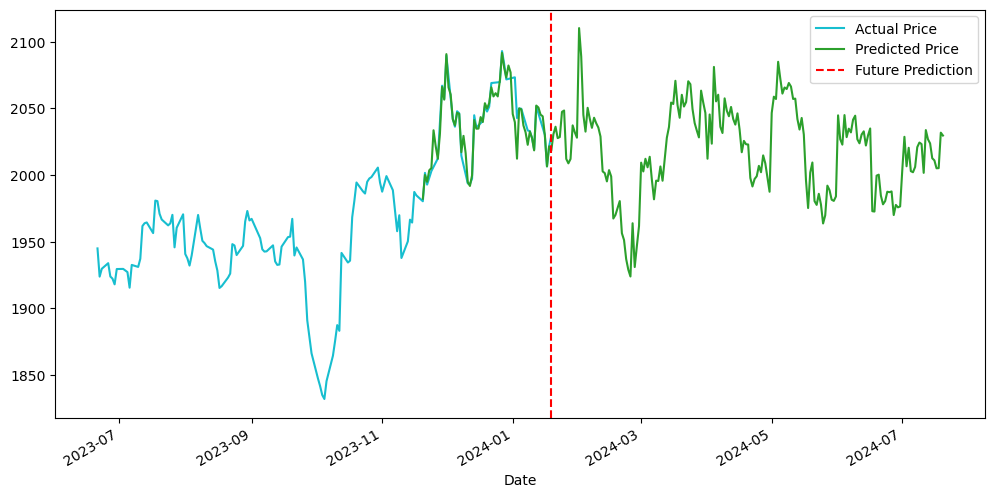

In [52]:
plt.figure(figsize=(12,6))

df[df['Date'] > "2023-06-20"].set_index("Date")['Close'].plot(label = "Actual Price",color = sns.color_palette()[-1])

prediction_df.set_index("Date")['Close'].plot(label = 'Predicted Price',color = sns.color_palette()[2])
plt.axvline(x = "2024-01-19",linestyle = "--",label = "Future Prediction",color = 'red')
plt.legend()
plt.show()